# Topic Modeling

In [ ]:
from pathlib import Path
from top2vec import Top2Vec
from data import get_documents_list, get_topic_modeling_path
from data import get_top2vec_embedding_model

## Method 1: Top2Vec
- get all paragraphs (not cleaned) as input for Top2Vec model

In [1]:
multilingual_documents = get_documents_list('sentences')

NameError: name 'get_documents_list' is not defined

In [3]:
multilingual_documents[200]

'In nächster Nähe lebten weitere Künstler wie Egon Wellesz, Hugo Botstiber und Hans Gál.'

## Train Top2Vec model on documents
- Recommended for multilingual datasets: 'distiluse-base-multilingual-cased' (pre-trained sentence transformer)
- no specified will use doc2vec method -> not multilingual
- no need to remove stop words

#### Parameter:
- ngram_vocab: True allows bigrams (no trigrams etc.!)
- min_count: ignore words with smaller total count
- verbose: True to print status duri training

In [4]:
top2vec_model = Top2Vec(multilingual_documents, verbose=True, ngram_vocab=True, embedding_model=get_top2vec_embedding_model())
topic_models_path: Path = Path(get_topic_modeling_path())

ImportError: universal-sentence-encoder-multilingual is not available.

Try: pip install top2vec[sentence_encoders]

Alternatively try: pip install tensorflow tensorflow_hub tensorflow_text

In [5]:
top2vec_model.save(topic_models_path.joinpath("Top2Vec_de_sentences"))

In [8]:
top2vec_model = Top2Vec.load(topic_models_path.joinpath("Top2Vec_de_sentences"))

In [9]:
top2vec_model.get_num_topics()

2

In [11]:
words, word_scores = top2vec_model.similar_words(keywords=["Schönberg"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

ValueError: 'schönberg' has not been learned by the model so it cannot be searched.

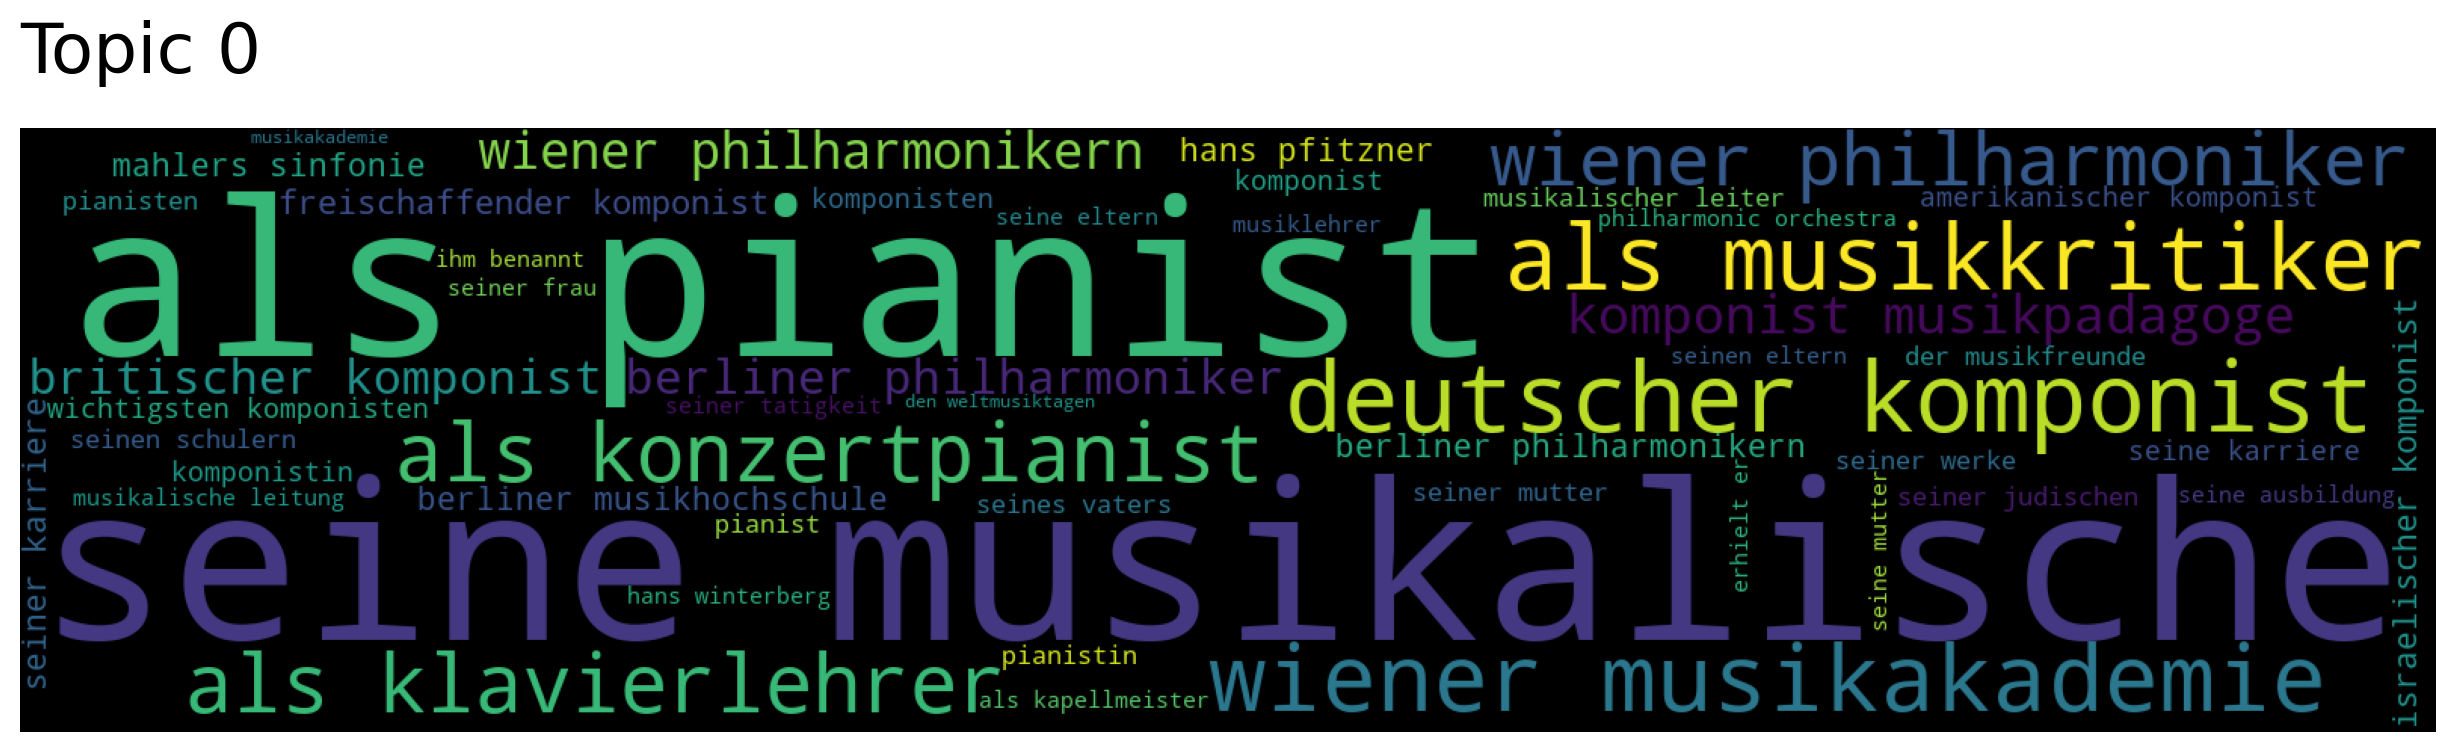

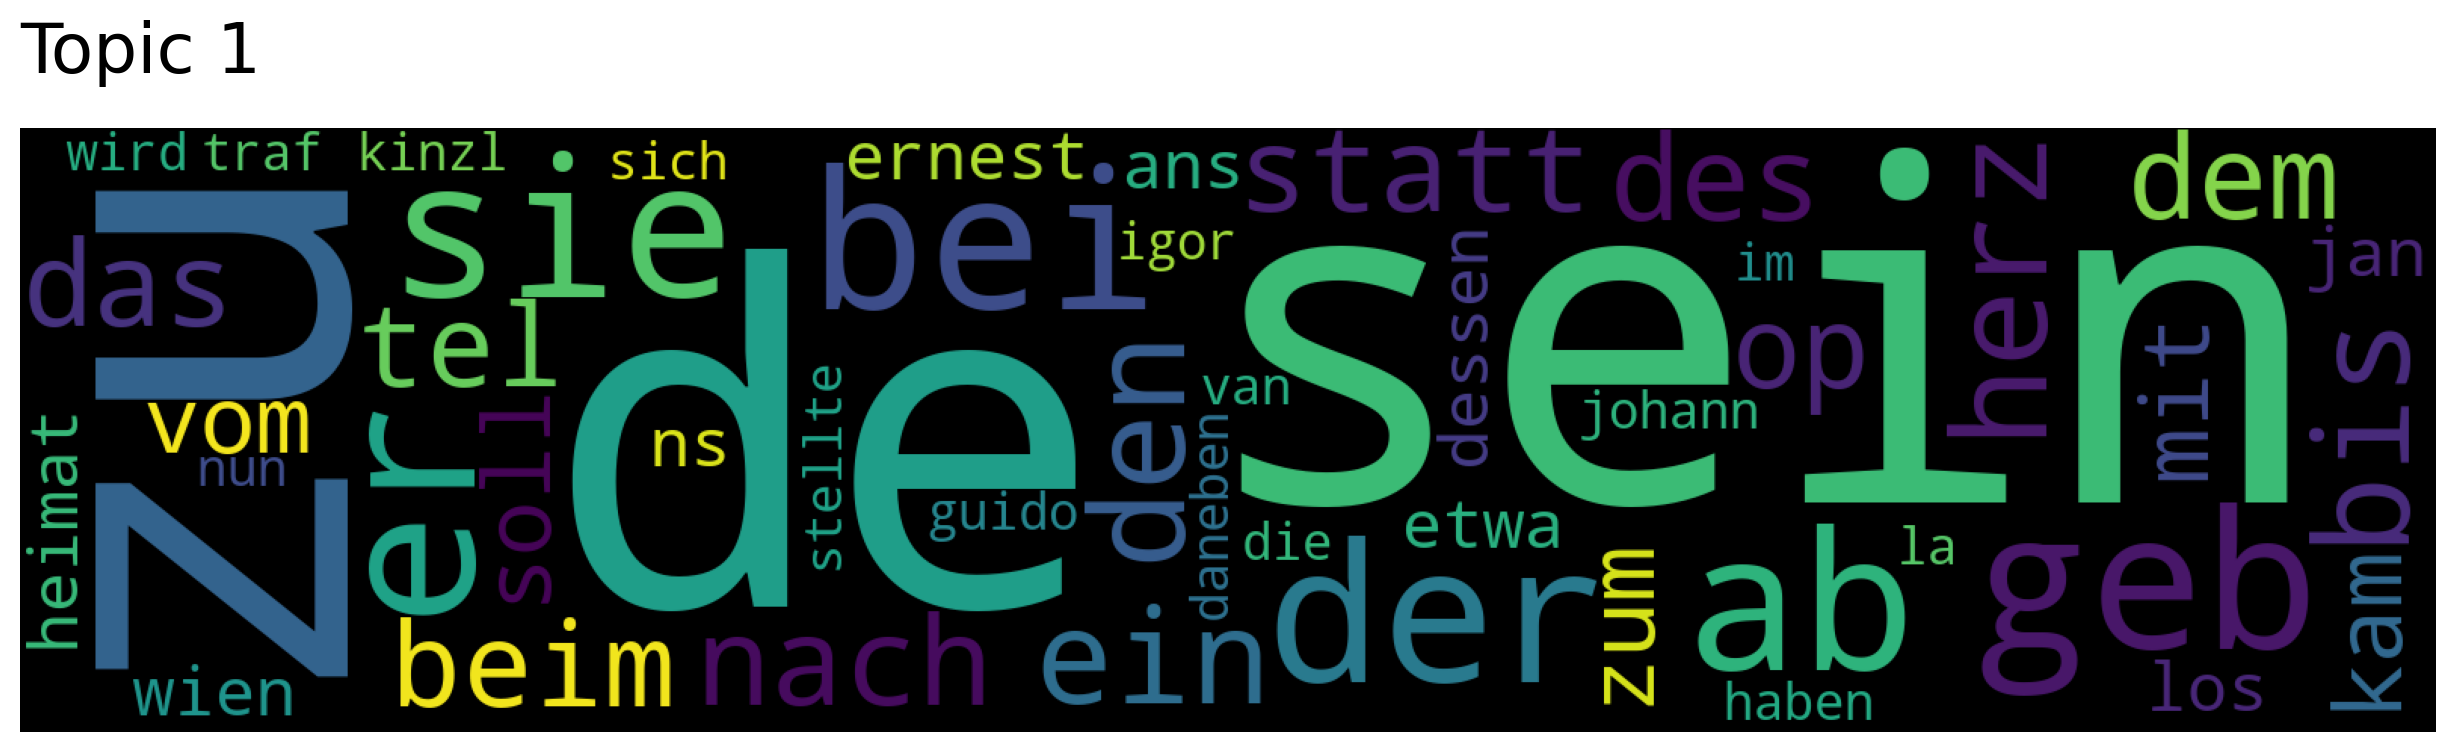

In [12]:
for topic in range(top2vec_model.get_num_topics()):
    top2vec_model.generate_topic_wordcloud(topic)